# NGA Open Data Project

Python code for importing SQL queries and creating data visualizations.

<hr style="border:1px solid gray">

In [82]:
# Import packages required.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [83]:
# Connect to SQLite database.
engine = create_engine('sqlite:///C:/Users/Ken/Desktop/NGA Open Data Project.db')

In [84]:
# Getting a view of all the tables in the database, making sure everything is correct.
pd.read_sql('SELECT * FROM sqlite_master WHERE type="table"', engine)

,type,name,tbl_name,rootpage,sql
0,table,constituents_altnames,constituents_altnames,5,CREATE TABLE constituents_altnames (\r\n al...
1,table,constituents_text_entries,constituents_text_entries,6,CREATE TABLE constituents_text_entries (\r\n ...
2,table,locations,locations,7,CREATE TABLE locations (\r\n locationID INT...
3,table,media_items,media_items,8,CREATE TABLE media_items (\r\n mediaID INTE...
4,table,media_relationships,media_relationships,9,CREATE TABLE media_relationships (\r\n medi...
5,table,object_associations,object_associations,11,CREATE TABLE object_associations (\r\n pare...
6,table,objects_constituents,objects_constituents,14,CREATE TABLE objects_constituents (\r\n obj...
7,table,objects_dimensions,objects_dimensions,15,CREATE TABLE objects_dimensions (\r\n objec...
8,table,objects_historical_data,objects_historical_data,18,CREATE TABLE objects_historical_data (\r\n ...
9,table,objects_terms,objects_terms,20,CREATE TABLE objects_terms (\r\n termID INT...


In [85]:
# Open and read contents of SQL file.
# Splitting queries by ';' into individual SQL queries. I seperated my SQL queries by ';'.
with open('C:/Users/Ken/Desktop/NGA Project - SQL Code.sql', 'r') as file:
    sql_queries = file.read().split(';')  

In [86]:
# Initialize empty dictionary to store dataframes.
dataframes = {}

# Execute each SQL statement one by one.
for idx, query in enumerate(sql_queries):
    # Check if the query is not empty after stripping whitespace.
    if query.strip():  
        # Execute query and store in DataFrame.
        df = pd.read_sql(query, engine)
        
        # Add the DataFrame to the dictionary with a key, starting from df1.
        dataframes[f'df{idx + 1}'] = df

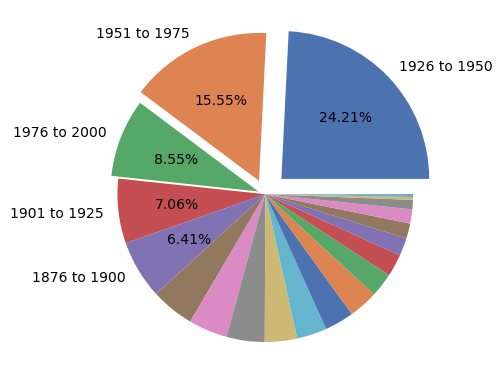

In [167]:
# SQL Query 1 - What timeframe or time period are most of the artworks created from?
# Create variable to hold just the DataFrame.
df1 = dataframes['df1']
# Create pie chart.
data = df1['count']
keys = ['1926 to 1950', '1951 to 1975', '1976 to 2000', '1901 to 1925', '1876 to 1900', '','','','','','','','','',\
          '','','','','','','']
explode = [0.15, 0.1, 0.05, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

palette_color = sns.color_palette('deep')

# Making it so that labels and percentages below a certain number do not show on chart.
plt.pie(data, labels=keys, colors=palette_color, autopct=lambda v: f'{v:.2f}%' if v > 5 else None, explode=explode) 

#plt.savefig('SQL_query_1.png', dpi=300, bbox_inches = 'tight')
plt.show()

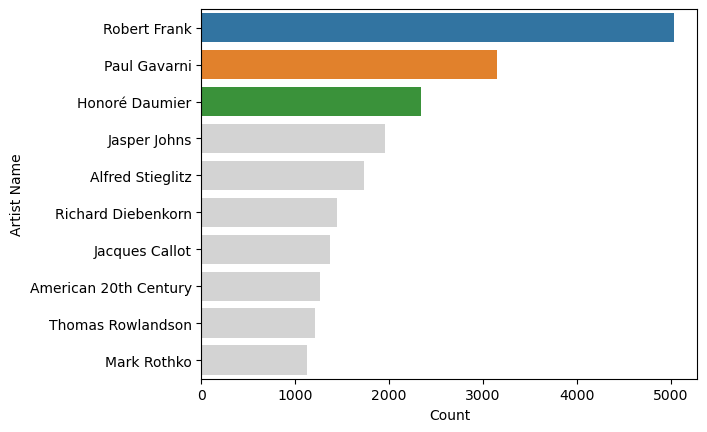

In [166]:
# SQL Query 2 - Who are the artists with the most works at the NGA?
df2 = dataframes['df2']
# Create bar chart.
ax = sns.barplot(data=df2, y='attribution', x='count')
# Highlight top 3.
for p in ax.patches:
   if p.get_y() > 2:
       p.set_facecolor('lightgrey')
        
plt.xlabel('Count')
plt.ylabel('Artist Name')

plt.show()

# Note: American 20th Century are anonymous artists.

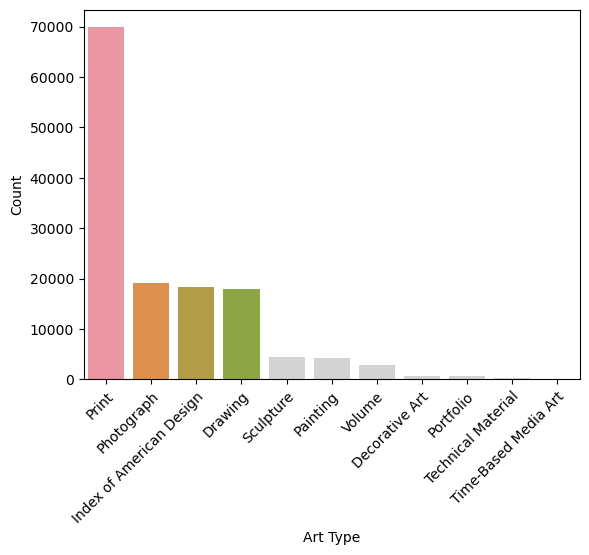

In [168]:
# SQL Query 3 - What is the breakdown of the types of artworks in the NGA collection? 
df3 = dataframes['df3']
# Create bar chart.
ax = sns.barplot(data=df3, y='count', x='subClassification')
# Highlight top 4.
for p in ax.patches:
   if p.get_x() > 3:
       p.set_facecolor('lightgrey')
        
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Art Type')
plt.ylabel('Count')

plt.show()

# Note: Index of American Design are watercolor renderings.

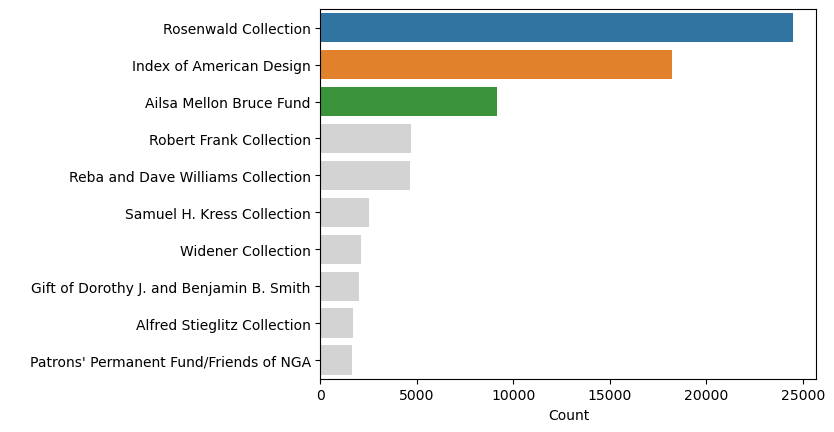

In [169]:
# SQL Query 4 - Where were most of these artworks sourced from? (e.g., collections, funds, donors)
df4 = dataframes['df4']
# Create bar chart.
ax = sns.barplot(data=df4, y='classification', x='count')
# Highlight top 3.
for p in ax.patches:
   if p.get_y() > 2:
       p.set_facecolor('lightgrey')
        
plt.xlabel('Count')
plt.ylabel(' ')
# Manually renamed some labels as they were too long.
plt.gca().set_yticklabels(['Rosenwald Collection', 'Index of American Design', 'Ailsa Mellon Bruce Fund',\
                           'Robert Frank Collection','Reba and Dave Williams Collection','Samuel H. Kress Collection',\
                           'Widener Collection','Gift of Dorothy J. and Benjamin B. Smith','Alfred Stieglitz Collection',\
                           "Patrons' Permanent Fund/Friends of NGA"])

plt.show()

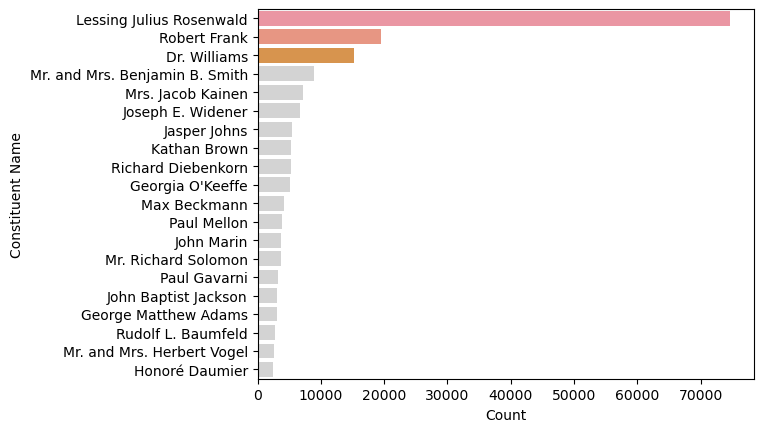

In [170]:
# SQL Query 5 - Who were the most active constituents to the NGA?
df5 = dataframes['df5']
# Create bar chart.
ax = sns.barplot(data=df5, y='forwardDisplayName', x='count')
# Highlight top 3.
for p in ax.patches:
   if p.get_y() > 2:
       p.set_facecolor('lightgrey')

plt.xlabel('Count')
plt.ylabel('Constituent Name')

plt.show()

In [92]:
# SQL Query 6 - How many Canadian artists are represented in the NGA collection?
# Answered in SQL query.
# 47

In [136]:
# SQL Query 7 - How many total art pieces are attributed to Canadian artists?
# Answered in SQL query.
# 154

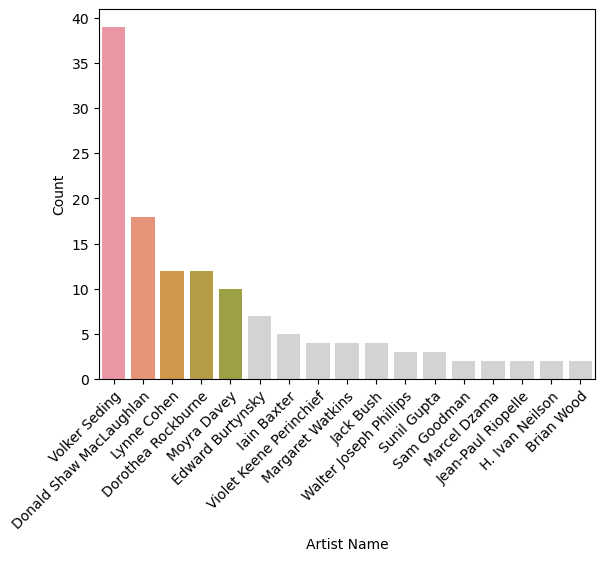

In [171]:
# SQL Query 8 - How many art pieces are attributed to each Canadian artist? 
df8 = dataframes['df8']
# Create bar chart, filtering data for Canadian artists with more than 1 attributed work of art.
ax = sns.barplot(data=df8[0:17], y='count', x='forwardDisplayName')
# Highlight artists with 10 or more pieces.
for p in ax.patches:
   if p.get_x() > 4:
       p.set_facecolor('lightgrey')
        
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Artist Name')
plt.ylabel('Count')

plt.show()

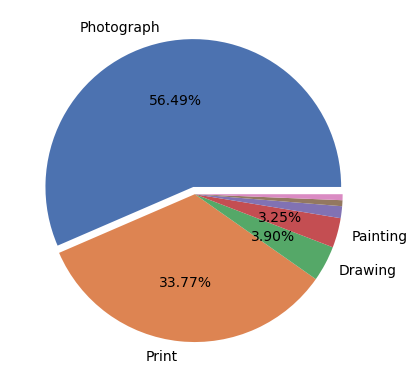

In [172]:
# SQL Query 9 - What is the breakdown of the types of artworks by Canadian artists?
df9 = dataframes['df9']
# Create pie plot.
data = df9['count']
keys = ['Photograph', 'Print', 'Drawing', 'Painting', '', '', '']
explode = [0.05, 0, 0, 0, 0, 0, 0]

palette_color = sns.color_palette('deep')

plt.pie(data, labels=keys, colors=palette_color, autopct=lambda v: f'{v:.2f}%' if v > 3 else None, explode=explode)

plt.show()

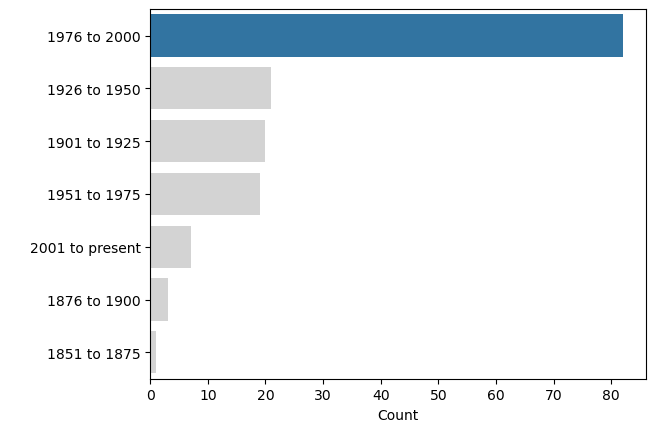

In [173]:
# SQL Query 10 - In which time period were these artworks by Canadian artists predominantly created?
df10 = dataframes['df10']
# Create bar chart.
ax = sns.barplot(data=df10, y='visualBrowserTimeSpan', x='count')
# Highlight top. 
for p in ax.patches:
   if p.get_y() > 0:
       p.set_facecolor('lightgrey')
        
plt.xlabel('Count')
plt.ylabel(' ')

plt.show()